# Homework w04d02 - Build your own kNN-classifier

Build your own k-nearest-neighbours classifier by defining functions which 
1. calculate the Euclidean distance between points in the dataset, 
1. define a majority vote function which returns the most frequent class given a list of class labels (make sure to take into account the possibility of a tie), 
1. construct a kNN-classifier which takes a training set with labeled points, new points which have to be classified, the parameter k, and which makes use of the previous functions to assign class labels to the new points.
1. Test your classifier on the iris dataset contained in sklearn. You can compare your results with the ones using the built-in kNN classifier. 

Hint: Start by restricting to only two of the four features and only two of the three class labels, that is the first 100 data points.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def calculate_distance(p, q, norm='l2'):
    """Takes two lists as the coordinates of two points and calculates the Euclidean distance between them."""
    # Assume points are tuples of ([x,y],label)
    #return ((p[0]-q[0])**2 + (p[1]-q[1])**2) ** 0.5
    if len(p) != len(q):
        print "List arguments of different length!"
    elif norm not in ['l1','l2']:
        print 'Choose for norm l1 or l2!'
    elif norm == 'l2':
        i = 0
        dist = 0
        while i < len(p):
            dist =  dist + (p[i]-q[i])**2
            i += 1
        return dist**0.5
    elif norm == 'l1':
        i = 0
        dist = 0
        while i < len(p):
            dist =  dist + np.abs(p[i]-q[i])
            i += 1
        return dist
        
# test distance calculation
print calculate_distance([0,1,7],[1,5,3],'l1')
print calculate_distance([0,1,7],[1,5,3],'l2')

9
5.74456264654


In [3]:
# you might find this package useful, see what the example does
import collections
labels = ['b','b','d','e','e']
print collections.Counter(labels), collections.Counter(labels).most_common(1)[0][0]
print max(collections.Counter(labels).values())

Counter({'b': 2, 'e': 2, 'd': 1}) b
2


In [4]:
def neighbour_vote(labels):
    """ Get the majority label from k neighbors."""
    # Is it possible to have a tie? How would you handle that?
    a = [label for label in collections.Counter(labels).keys() 
         if  collections.Counter(labels)[label] == max(collections.Counter(labels).values())] 
    if len(a)==1:
        vote = a[0]
    elif len(a)>1:
        # if several classes are represented equally among the k neighbours, choose randomly
        vote = a[np.random.randint(len(a))]
    return vote

In [5]:
def knn_classifier(labeled_points, new_point, k=5,norm='l2'):
    """ Given labeled points and one new point, return a label based on the votes of k neighbors (default is k=5).
        Can choose l1 or l2 (default) norm for distance measure.
    """
    label_distances = []

    for p in labeled_points:
        distance = calculate_distance(p[0],new_point,norm)
        label_distances.append((distance,p[1]))
    
    label_distances.sort() # Put them in order
    prediction = neighbour_vote([label[1] for label in label_distances[:k]])
    return prediction

In [6]:
# import the iris flower dataset
iris = datasets.load_iris()
X = iris.data[:, :]  # use just the first two classes.
y = iris.target[:]
# Split 70/30 into initial data and new points to classify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
df_training = pd.DataFrame(X_train,columns=['x_0','x_1','x_2','x_3'])
df_training['class'] = y_train
df_test = pd.DataFrame(X_test,columns=['x_0','x_1','x_2','x_3'])
df_test['class'] = y_test

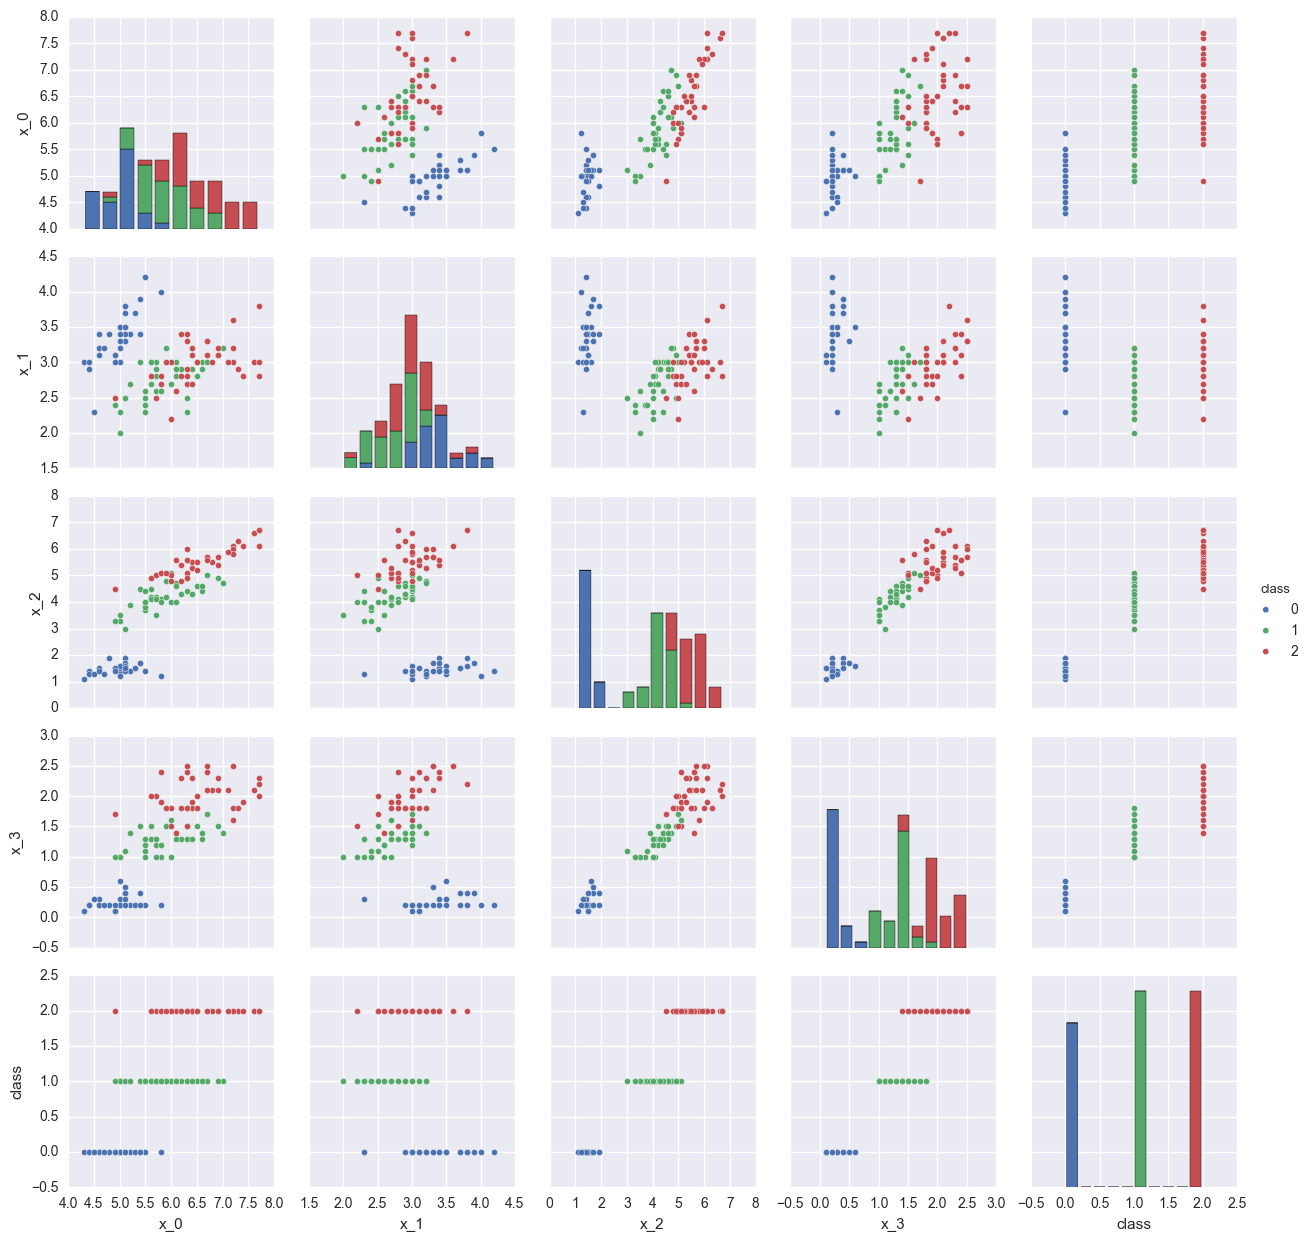

In [8]:
sns.pairplot( data = df_training,hue = "class")

In [9]:
#Iteratively classify new points in test_df, based on the labeled points in training_df, and track your accuracy.

training = df_training.T.values.tolist()
test = df_test.T.values.tolist()
labeled_points = zip(zip(training[0],training[1],training[2],training[3]),training[4])
test_points = zip(zip(test[0],test[1],test[2],test[3]),test[4])

# classify a test point
knn_classifier(labeled_points, ((6.0,2.5,55.,3.)),k=5)

2.0

In [10]:
print labeled_points[0], test_points[0]

((5.5, 2.4, 3.7, 1.0), 1.0) ((6.1, 2.8, 4.7, 1.2), 1.0)


In [11]:
print len(training), len(training[0]), training[0][:4], training[4][:4]

5 105 [5.5, 6.3, 6.4, 6.6] [1.0, 2.0, 2.0, 1.0]


In [12]:
len(test_points)

45

In [13]:
# Calculate the number of misclassified points
accuracy_l1 = np.array([(k,
                         len(test_points) - np.sum(np.array(
        [knn_classifier(labeled_points, test_points[j][0],k,'l1')== test_points[j][1] 
         for j in range(len(test_points))] ))) for k in range(1,len(test_points))])

accuracy_l2 = np.array([(k,
                         len(test_points) - np.sum(np.array(
        [knn_classifier(labeled_points, test_points[j][0],k,'l2')== test_points[j][1] 
         for j in range(len(test_points))] ))) for k in range(1,len(test_points))])

In [14]:
accuracy_l2[:10]

array([[ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 5,  0],
       [ 6,  1],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [10,  0]])

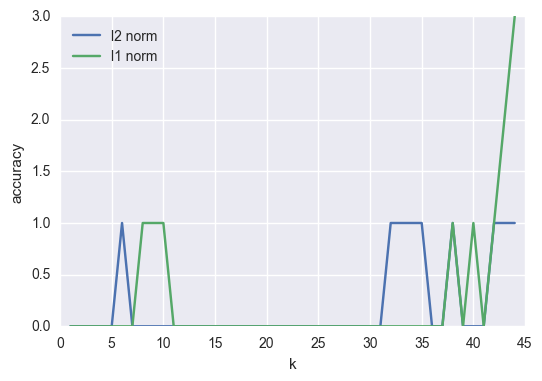

In [15]:
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
line_1, = plt.plot(accuracy_l2[:,0],accuracy_l2[:,1])
line_2, = plt.plot(accuracy_l1[:,0],accuracy_l1[:,1])
plt.legend([line_1, line_2], ['l2 norm', 'l1 norm'],loc='upper left')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()